Import packacges.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale

%aimport Sherlock
from Sherlock import Sherlock
from RBF import bases
from utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [2]:
X, y, _, names, _ = read_design_space('../../final_result_impl_mergesort.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

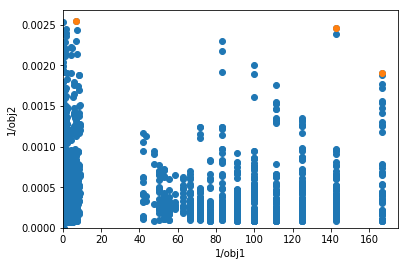

In [3]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.0


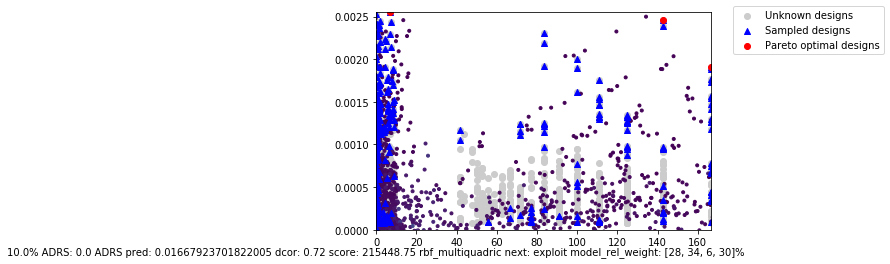

In [4]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.1),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest-gpy", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [5]:
sherlock.known_idx

array([1094, 2017,  431, 2916, 3190, 1717,  197, 3156, 2505, 1632, 1722,
       3185, 3171, 3049,  945,  402, 1611, 2510, 3051,  803, 3077,  734,
       2530, 3110, 3050, 3053, 3065, 3046, 2576,   35,  786,  717,  740,
        998, 3138, 3109,  807,  728,  768,  798,  723,  793,  763, 1615,
       2487,  170, 3139, 1683, 1682, 1636, 1637,  739, 2492, 1619,  762,
       1660,  787, 2581,   33,  785, 2491, 3135, 2511,  567, 2559, 2387,
       3211, 2586, 1705,  808, 2535,   21, 1635,   36, 3144, 2488, 2558,
       2743, 2557,  722,    9,  745, 1616,  792, 2512, 2478, 1638, 1661,
       1620, 3134,  746, 1681,  934, 1001, 2564,  788,  738, 1236, 3146,
         10,  729,  863, 1057, 3121,    1, 1643,  775,   22, 1666, 2156,
       3103, 1837, 3078, 2534,  885, 3093, 1706,  884,  825, 1767,    0,
        769, 2792, 1253,  683,   12,   24, 1968, 3054,  933, 2493, 3031,
        718, 3107, 2489, 3085,  751, 3136,  741, 1688,  809, 2563, 1621,
       2582,  774, 2728, 2155, 2517,   44, 3160,  7